<a href="https://colab.research.google.com/github/hashiramauchiha/Machine-Learning-Projects/blob/main/Flight_Delay_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Flight_Delay_Prediction [WIDHYA]

**Importing Some of the Libraries**

In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics

In [ ]:
!pip install opendatasets

In [ ]:
import opendatasets as od
url = 'https://www.kaggle.com/usdot/flight-delays?select=flights.csv'

In [ ]:
od.download(url, '.')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: art3mix
Your Kaggle Key: ··········


  3%|▎         | 6.00M/191M [00:00<00:03, 58.0MB/s]

100%|██████████| 191M/191M [00:01<00:00, 128MB/s]


In [ ]:
import os

In [ ]:
os.listdir( '.')

['.config', 'flight-delays', 'sample_data']

In [ ]:
dataframe_path = '/content/flight-delays/flights.csv'

In [ ]:
dataframe_raw = pd.read_csv(dataframe_path, low_memory=False)

In [ ]:
dataframe_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5819079 entries, 0 to 5819078
Data columns (total 31 columns):
 #   Column               Dtype  
---  ------               -----  
 0   YEAR                 int64  
 1   MONTH                int64  
 2   DAY                  int64  
 3   DAY_OF_WEEK          int64  
 4   AIRLINE              object 
 5   FLIGHT_NUMBER        int64  
 6   TAIL_NUMBER          object 
 7   ORIGIN_AIRPORT       object 
 8   DESTINATION_AIRPORT  object 
 9   SCHEDULED_DEPARTURE  int64  
 10  DEPARTURE_TIME       float64
 11  DEPARTURE_DELAY      float64
 12  TAXI_OUT             float64
 13  WHEELS_OFF           float64
 14  SCHEDULED_TIME       float64
 15  ELAPSED_TIME         float64
 16  AIR_TIME             float64
 17  DISTANCE             int64  
 18  WHEELS_ON            float64
 19  TAXI_IN              float64
 20  SCHEDULED_ARRIVAL    int64  
 21  ARRIVAL_TIME         float64
 22  ARRIVAL_DELAY        float64
 23  DIVERTED             int64  
 24

In [ ]:
df = dataframe_raw.copy( deep=True)

Taking 100000 rows from dataset

In [ ]:
df = df[0:100000]

In [ ]:
len(df)

100000

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 31 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   YEAR                 100000 non-null  int64  
 1   MONTH                100000 non-null  int64  
 2   DAY                  100000 non-null  int64  
 3   DAY_OF_WEEK          100000 non-null  int64  
 4   AIRLINE              100000 non-null  object 
 5   FLIGHT_NUMBER        100000 non-null  int64  
 6   TAIL_NUMBER          99833 non-null   object 
 7   ORIGIN_AIRPORT       100000 non-null  object 
 8   DESTINATION_AIRPORT  100000 non-null  object 
 9   SCHEDULED_DEPARTURE  100000 non-null  int64  
 10  DEPARTURE_TIME       97702 non-null   float64
 11  DEPARTURE_DELAY      97702 non-null   float64
 12  TAXI_OUT             97629 non-null   float64
 13  WHEELS_OFF           97629 non-null   float64
 14  SCHEDULED_TIME       100000 non-null  float64
 15  ELAPSED_TIME      

In [ ]:
df.value_counts('DIVERTED')

DIVERTED
0    99776
1      224
dtype: int64

In [ ]:
df.corr()

,YEAR,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
YEAR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MONTH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DAY,NaN,NaN,1.000000,-0.497084,0.004412,-0.138130,-0.124369,0.060064,0.093451,-0.119781,-0.026285,-0.018470,-0.036330,-0.035208,-0.095731,0.037407,-0.110820,-0.091687,0.070770,0.004847,-0.006000,0.097693,-0.010550,-0.001603,0.033213,0.061960
DAY_OF_WEEK,NaN,NaN,-0.497084,1.000000,0.010955,0.046914,0.045182,0.055632,0.007291,0.044150,0.019755,0.029025,0.030678,0.024666,0.013749,-0.017789,0.031725,0.011477,0.067520,-0.000709,-0.006409,-0.019626,0.008156,0.003648,0.033729,-0.050835
FLIGHT_NUMBER,NaN,NaN,0.004412,0.010955,1.000000,-0.003027,0.010140,0.034863,0.061010,0.016377,-0.337801,-0.318819,-0.339135,-0.356196,-0.003670,0.014464,-0.018891,0.000753,0.056163,0.007155,0.090008,-0.032564,-0.007260,0.023770,0.076581,0.004246
SCHEDULED_DEPARTURE,NaN,NaN,-0.138130,0.046914,-0.003027,1.000000,0.943186,0.174254,-0.081496,0.912232,-0.019873,-0.025744,-0.011993,0.000321,0.585786,-0.027502,0.731240,0.552653,0.154951,0.002515,-0.002631,-0.112393,-0.017957,-0.054419,0.186286,-0.042004
DEPARTURE_TIME,NaN,NaN,-0.124369,0.045182,0.010140,0.943186,1.000000,0.243960,-0.070081,0.966477,-0.031873,-0.035204,-0.024384,-0.016562,0.618850,-0.017759,0.734970,0.584615,0.223654,0.006576,0.009679,-0.093096,-0.012820,-0.013304,0.247325,-0.046406
DEPARTURE_DELAY,NaN,NaN,0.060064,0.055632,0.034863,0.174254,0.243960,1.000000,0.061905,0.231399,0.005868,0.015257,0.002733,0.004591,0.090696,0.040285,0.155150,0.079639,0.950838,0.020787,0.030862,0.085794,0.008040,0.606954,0.605289,0.210402
TAXI_OUT,NaN,NaN,0.093451,0.007291,0.061010,-0.081496,-0.070081,0.061905,1.000000,-0.043114,0.096191,0.215749,0.077234,0.057871,-0.045096,0.009041,-0.062325,-0.045611,0.245363,0.009810,0.010763,0.407371,-0.008021,-0.024674,-0.129879,0.119412
WHEELS_OFF,NaN,NaN,-0.119781,0.044150,0.016377,0.912232,0.966477,0.231399,-0.043114,1.000000,-0.038173,-0.038217,-0.031646,-0.027282,0.642358,-0.015089,0.744697,0.608611,0.217344,0.006524,0.001293,-0.085582,-0.013912,-0.017376,0.223010,-0.055273


In [ ]:
df[df.columns[1:]].corr()['ARRIVAL_DELAY'][:].sort_values(ascending=False)

ARRIVAL_DELAY          1.000000
DEPARTURE_DELAY        0.950838
AIRLINE_DELAY          0.592718
LATE_AIRCRAFT_DELAY    0.572956
AIR_SYSTEM_DELAY       0.259700
TAXI_OUT               0.245363
WEATHER_DELAY          0.235906
DEPARTURE_TIME         0.223654
WHEELS_OFF             0.217344
TAXI_IN                0.170073
SCHEDULED_DEPARTURE    0.154951
SCHEDULED_ARRIVAL      0.140565
WHEELS_ON              0.088131
ARRIVAL_TIME           0.076791
DAY                    0.070770
DAY_OF_WEEK            0.067520
FLIGHT_NUMBER          0.056163
ELAPSED_TIME           0.048448
SECURITY_DELAY         0.006070
AIR_TIME              -0.002742
SCHEDULED_TIME        -0.022043
DISTANCE              -0.023821
MONTH                       NaN
DIVERTED                    NaN
CANCELLED                   NaN
Name: ARRIVAL_DELAY, dtype: float64

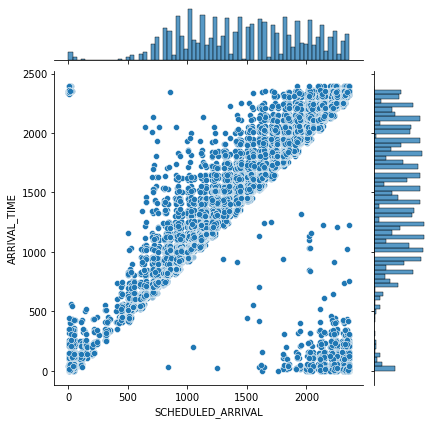

In [ ]:
sns.jointplot(data=df, x="SCHEDULED_ARRIVAL", y="ARRIVAL_TIME")

In [ ]:
df=df.drop(['YEAR','FLIGHT_NUMBER','AIRLINE','DISTANCE','TAIL_NUMBER','TAXI_OUT', 'SCHEDULED_TIME','DEPARTURE_TIME','WHEELS_OFF','ELAPSED_TIME', 'AIR_TIME','WHEELS_ON','DAY_OF_WEEK','TAXI_IN','CANCELLATION_REASON'], axis=1)

In [ ]:
df.columns

Index(['MONTH', 'DAY', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       'SCHEDULED_DEPARTURE', 'DEPARTURE_DELAY', 'SCHEDULED_ARRIVAL',
       'ARRIVAL_TIME', 'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED',
       'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY',
       'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY'],
      dtype='object')

In [ ]:
df['ARRIVAL_DELAY'].head(5)

0   -22.0
1    -9.0
2     5.0
3    -9.0
4   -21.0
Name: ARRIVAL_DELAY, dtype: float64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 16 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   MONTH                100000 non-null  int64  
 1   DAY                  100000 non-null  int64  
 2   ORIGIN_AIRPORT       100000 non-null  object 
 3   DESTINATION_AIRPORT  100000 non-null  object 
 4   SCHEDULED_DEPARTURE  100000 non-null  int64  
 5   DEPARTURE_DELAY      97702 non-null   float64
 6   SCHEDULED_ARRIVAL    100000 non-null  int64  
 7   ARRIVAL_TIME         97560 non-null   float64
 8   ARRIVAL_DELAY        97387 non-null   float64
 9   DIVERTED             100000 non-null  int64  
 10  CANCELLED            100000 non-null  int64  
 11  AIR_SYSTEM_DELAY     34625 non-null   float64
 12  SECURITY_DELAY       34625 non-null   float64
 13  AIRLINE_DELAY        34625 non-null   float64
 14  LATE_AIRCRAFT_DELAY  34625 non-null   float64
 15  WEATHER_DELAY     

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cat_types = [
    'ORIGIN_AIRPORT','DESTINATION_AIRPORT'
]
df[cat_types] = df[cat_types].apply(lambda col: le.fit_transform(col))


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 16 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   MONTH                100000 non-null  int64  
 1   DAY                  100000 non-null  int64  
 2   ORIGIN_AIRPORT       100000 non-null  int64  
 3   DESTINATION_AIRPORT  100000 non-null  int64  
 4   SCHEDULED_DEPARTURE  100000 non-null  int64  
 5   DEPARTURE_DELAY      97702 non-null   float64
 6   SCHEDULED_ARRIVAL    100000 non-null  int64  
 7   ARRIVAL_TIME         97560 non-null   float64
 8   ARRIVAL_DELAY        97387 non-null   float64
 9   DIVERTED             100000 non-null  int64  
 10  CANCELLED            100000 non-null  int64  
 11  AIR_SYSTEM_DELAY     34625 non-null   float64
 12  SECURITY_DELAY       34625 non-null   float64
 13  AIRLINE_DELAY        34625 non-null   float64
 14  LATE_AIRCRAFT_DELAY  34625 non-null   float64
 15  WEATHER_DELAY     

In [ ]:
df.isna().sum()

MONTH                      0
DAY                        0
ORIGIN_AIRPORT             0
DESTINATION_AIRPORT        0
SCHEDULED_DEPARTURE        0
DEPARTURE_DELAY         2298
SCHEDULED_ARRIVAL          0
ARRIVAL_TIME            2440
ARRIVAL_DELAY           2613
DIVERTED                   0
CANCELLED                  0
AIR_SYSTEM_DELAY       65375
SECURITY_DELAY         65375
AIRLINE_DELAY          65375
LATE_AIRCRAFT_DELAY    65375
WEATHER_DELAY          65375
dtype: int64

In [ ]:
df = df.fillna(df.mean())

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 16 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   MONTH                100000 non-null  int64  
 1   DAY                  100000 non-null  int64  
 2   ORIGIN_AIRPORT       100000 non-null  int64  
 3   DESTINATION_AIRPORT  100000 non-null  int64  
 4   SCHEDULED_DEPARTURE  100000 non-null  int64  
 5   DEPARTURE_DELAY      100000 non-null  float64
 6   SCHEDULED_ARRIVAL    100000 non-null  int64  
 7   ARRIVAL_TIME         100000 non-null  float64
 8   ARRIVAL_DELAY        100000 non-null  float64
 9   DIVERTED             100000 non-null  int64  
 10  CANCELLED            100000 non-null  int64  
 11  AIR_SYSTEM_DELAY     100000 non-null  float64
 12  SECURITY_DELAY       100000 non-null  float64
 13  AIRLINE_DELAY        100000 non-null  float64
 14  LATE_AIRCRAFT_DELAY  100000 non-null  float64
 15  WEATHER_DELAY     

In [ ]:
df.describe()

,MONTH,DAY,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_DELAY,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
count,100000.0,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.0,3.733920,154.846290,154.624480,1306.348280,19.937749,1481.115620,1458.02992,18.342304,0.002240,0.023890,14.026801,0.070787,17.853921,26.014556,2.751971
std,0.0,1.815542,84.577924,84.484687,482.325506,45.313768,498.916358,531.60497,48.235406,0.047276,0.152707,15.278682,0.995924,25.612673,25.062969,10.159597
min,1.0,1.000000,0.000000,0.000000,5.000000,-39.000000,1.000000,1.00000,-65.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.0,2.000000,81.000000,81.000000,904.000000,-3.000000,1100.000000,1056.00000,-8.000000,0.000000,0.000000,14.026801,0.000000,17.000000,26.014556,0.000000
50%,1.0,4.000000,166.000000,166.000000,1300.000000,3.000000,1500.000000,1458.02992,5.000000,0.000000,0.000000,14.026801,0.070787,17.853921,26.014556,2.751971
75%,1.0,5.000000,220.000000,219.000000,1720.000000,24.000000,1908.000000,1905.00000,26.000000,0.000000,0.000000,14.026801,0.070787,17.853921,26.014556,2.751971
max,1.0,7.000000,311.000000,311.000000,2359.000000,1380.000000,2359.000000,2400.00000,1384.000000,1.000000,1.000000,590.000000,107.000000,1380.000000,891.000000,562.000000


In [ ]:
df['ARRIVAL_DELAY'].head(5)

0   -22.0
1    -9.0
2     5.0
3    -9.0
4   -21.0
Name: ARRIVAL_DELAY, dtype: float64

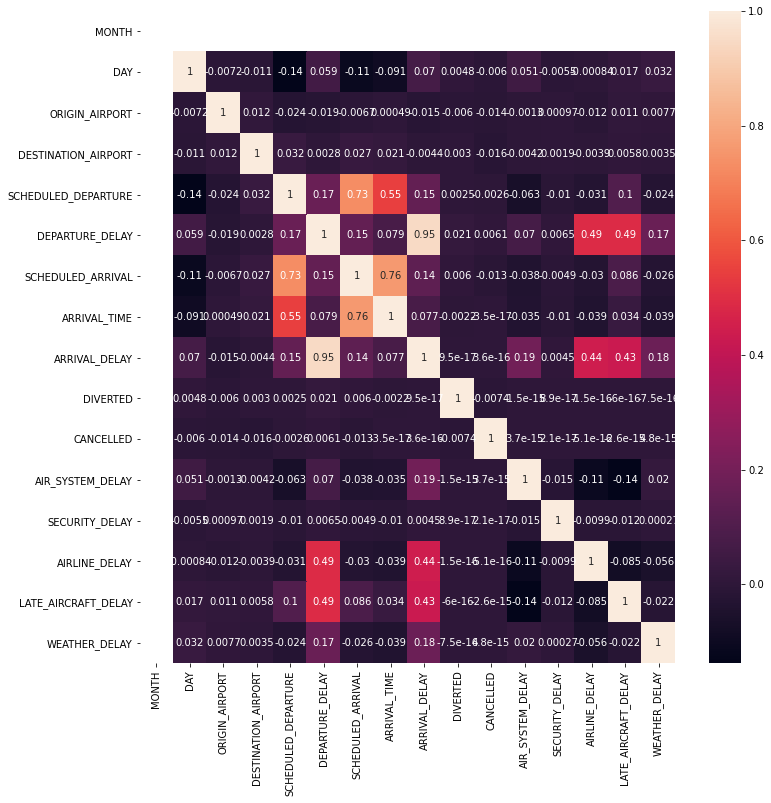

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots( figsize= (12, 12))
sns.heatmap(df.corr(), annot=True, ax = ax )

In [ ]:
 store = pd.to_numeric(df['ARRIVAL_DELAY'])

In [ ]:
result = []
for row in store: 
  if row > 15: 
    result.append( 1)
  else: 
    result.append(0)

In [ ]:
df['result'] = result

In [ ]:
df['result'].head()

0    0
1    0
2    0
3    0
4    0
Name: result, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   MONTH                100000 non-null  int64  
 1   DAY                  100000 non-null  int64  
 2   ORIGIN_AIRPORT       100000 non-null  int64  
 3   DESTINATION_AIRPORT  100000 non-null  int64  
 4   SCHEDULED_DEPARTURE  100000 non-null  int64  
 5   DEPARTURE_DELAY      100000 non-null  float64
 6   SCHEDULED_ARRIVAL    100000 non-null  int64  
 7   ARRIVAL_TIME         100000 non-null  float64
 8   ARRIVAL_DELAY        100000 non-null  float64
 9   DIVERTED             100000 non-null  int64  
 10  CANCELLED            100000 non-null  int64  
 11  AIR_SYSTEM_DELAY     100000 non-null  float64
 12  SECURITY_DELAY       100000 non-null  float64
 13  AIRLINE_DELAY        100000 non-null  float64
 14  LATE_AIRCRAFT_DELAY  100000 non-null  float64
 15  WEATHER_DELAY     

**Selecting these Columns For model building.**

-->'MONTH', 'DAY', 'SCHEDULED_DEPARTURE', 'DEPARTURE_DELAY', 'SCHEDULED_ARRIVAL', 'DIVERTED', 'CANCELLED', 'AIR_SYSTEM_DELAY','SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY','WEATHER_DELAY', 'result'

In [ ]:
df=df.drop(['ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'ARRIVAL_TIME', 'ARRIVAL_DELAY'],axis=1)
df

,MONTH,DAY,SCHEDULED_DEPARTURE,DEPARTURE_DELAY,SCHEDULED_ARRIVAL,DIVERTED,CANCELLED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,result
0,1,1,5,-11.0,430,0,0,14.026801,0.070787,17.853921,26.014556,2.751971,0
1,1,1,10,-8.0,750,0,0,14.026801,0.070787,17.853921,26.014556,2.751971,0
2,1,1,20,-2.0,806,0,0,14.026801,0.070787,17.853921,26.014556,2.751971,0
3,1,1,20,-5.0,805,0,0,14.026801,0.070787,17.853921,26.014556,2.751971,0
4,1,1,25,-1.0,320,0,0,14.026801,0.070787,17.853921,26.014556,2.751971,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1,7,1108,-6.0,1219,0,0,14.026801,0.070787,17.853921,26.014556,2.751971,0
99996,1,7,1108,9.0,1842,0,0,14.026801,0.070787,17.853921,26.014556,2.751971,0
99997,1,7,1108,-7.0,1225,0,0,14.026801,0.070787,17.853921,26.014556,2.751971,0
99998,1,7,1109,7.0,1454,0,0,14.026801,0.070787,17.853921,26.014556,2.751971,0


**TRAIN-TEST SPLIT**

Spliting the data into train and test in 70:30 respectively with Random Seet 42

In [ ]:
x , y = df[:,:-1] , df[:,-1]
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.30,random_state=42)

Using Standard Scalar Standardize the data such that It transforms the data in such a manner that it has mean as 0 and standard deviation as 1

In [ ]:
scaledFeatures = StandardScaler ().fit_transform(x_train,x_test)

**MODEL BUILDING**

Using DecisionTreeClasifier

In [ ]:
clf=DecisionTreeClassifier()
clf = clf.fit(x_train,y_train)

In [ ]:
predict=clf.predict_proba(x_test)
predict

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [0., 1.]])

AUC score of Model

In [ ]:
auc_score = roc_auc_score(y_test, predict[:,1])
auc_score

NameError: ignored

In [ ]:
print('AUC Score of Model is: {} %'.format(round(auc_score*100,2)))

AUC Score of Model is: 99.8 %


#### Confusion Matrix and Classification Report

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result1 = confusion_matrix(y_test, predict[:,1])
print("Confusion Matrix:")
print(result1)
print('')
result2 = classification_report(y_test, predict[:,1])
print("Classification Report:",)
print (result2)
result3 = accuracy_score(y_test,predict[:,1])
print("Accuracy:",result3)

NameError: ignored

In [ ]:
class_names=[0,1]
fig,ax=plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(result1), annot=True, cmap="PuBuGn" ,fmt='g')## visualized confusion matrix using heatmap
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

NameError: ignored

#### Accuracy, Precision, and Recall achived by model.

In [ ]:
print("Accuracy Achieved:",round(metrics.accuracy_score(y_test, predict[:,1])*100,2),'%')
print(' ')
print("Precision Achieved:",round(metrics.precision_score(y_test, predict[:,1])*100,2),'%')
print(' ')
print("Recall Achieved:",round(metrics.recall_score(y_test, predict[:,1])*100,2),'%')

Accuracy Achieved: 99.82 %
 
Precision Achieved: 99.82 %
 
Recall Achieved: 99.7 %
